In [1]:
tests= ["University2/university_ps_dcexpanded_new_train.csv", "University1/university_saptarshi_train.csv", "Company/it_train_new1.csv"]
trains = ["University2/university_new_test.csv","University1/university_saptarshi_train.csv","Company/it_train_new1.csv"]
data_names = {0:"University2",1:"University1",2:"Company"}

In [2]:
import threading
import numpy as np
import os
import sys
import re
import csv
import json
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


C:\Users\tipsh\AppData\Local\Temp\ipykernel_5404\2821745691.py:13: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def change_from_train_data(train, test):
    """
    Finds all the entries which have only one change in the test data entry values from train data
    Returns a DataFrame with the test data entries which have one change from train data
    """
    columns = test.columns
    new = pd.DataFrame(columns=columns)
    new2 = pd.DataFrame(columns=columns)
    train_set = set(map(tuple, train.values))
    # Remove access column
    columns = test.columns.drop('Access')
    
    for _, test_row in test.iterrows():
        found_change = False
        for _, train_row in train.iterrows():
            changes = sum(1 for col, val in zip(columns,test_row) if train_row[col] != val)
            
            if changes == 1:
                print('train_row',train_row)
                new = new._append(test_row)
                found_change = True
                break  # Break the loop once a change is found
        if not found_change:
            new2 = new2._append(test_row)

    new.reset_index(drop=True, inplace=True)  # Reset the index of the new DataFrame

    return new,new2


def change_from_train_data_count(train,test):
    """Finds the number of entries which have only one change in the test data entries from train data
        Returns the number of entries which have one change from train data"""
    # Read the train and test data
    train_data = pd.read_csv(train)
    test_data = pd.read_csv(test)
    # Find the columns which are different in test data from train data
    diff = test_data.columns.difference(train_data.columns)
    # Find the rows which are different in test data from train data
    test_data = test_data[diff]
    return test_data.shape[0]

In [4]:
import pandas as pd

def new_attribute_values(test_data, train_data):
    columns = test_data.columns
    
    new = {}
    for column in columns:
        x = set(test_data[column].unique())
        y = set(train_data[column].unique())
        z = list(x - y)
        new[column] = z
    return new


C:\Users\tipsh\AppData\Local\Temp\ipykernel_5404\3639133829.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_datas[0]['Year'] = train_datas[0]['Year'].replace('NotA',-1)
C:\Users\tipsh\AppData\Local\Temp\ipykernel_5404\3639133829.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_datas[0]['Year.1'] = train_datas[0]['Year.1'].replace('NotA',-1)


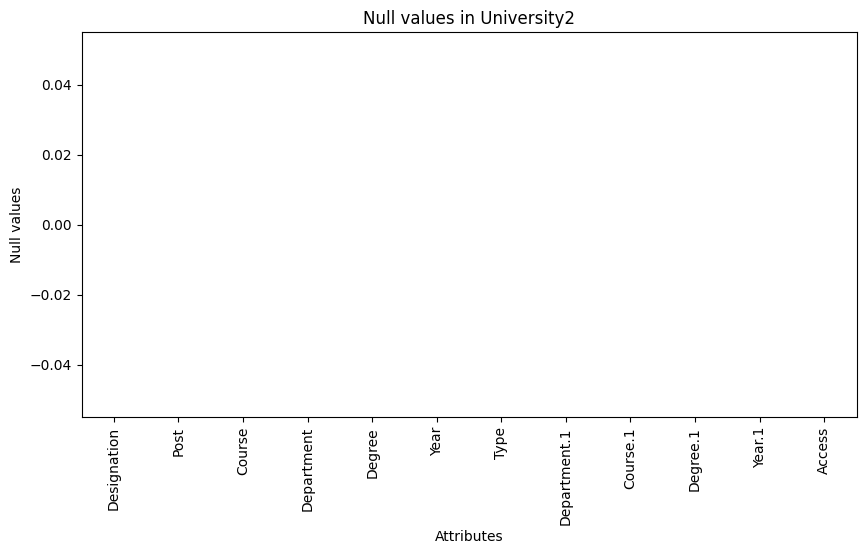

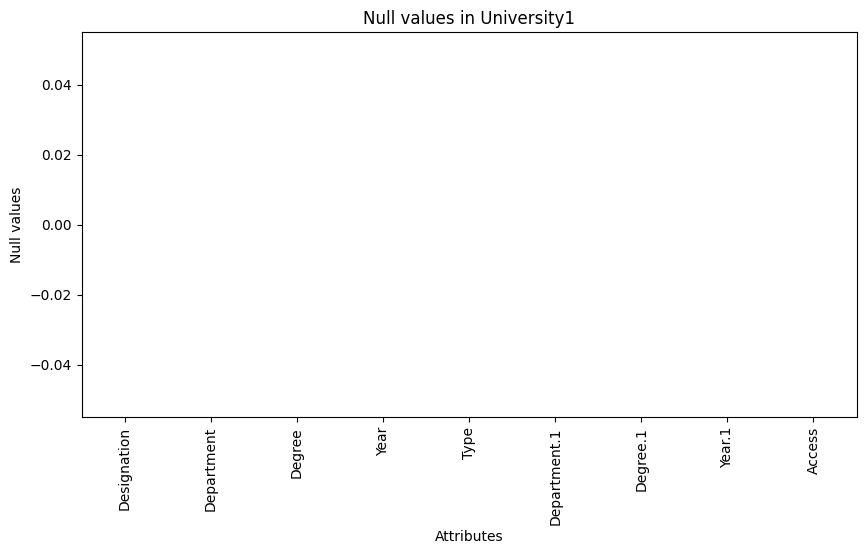

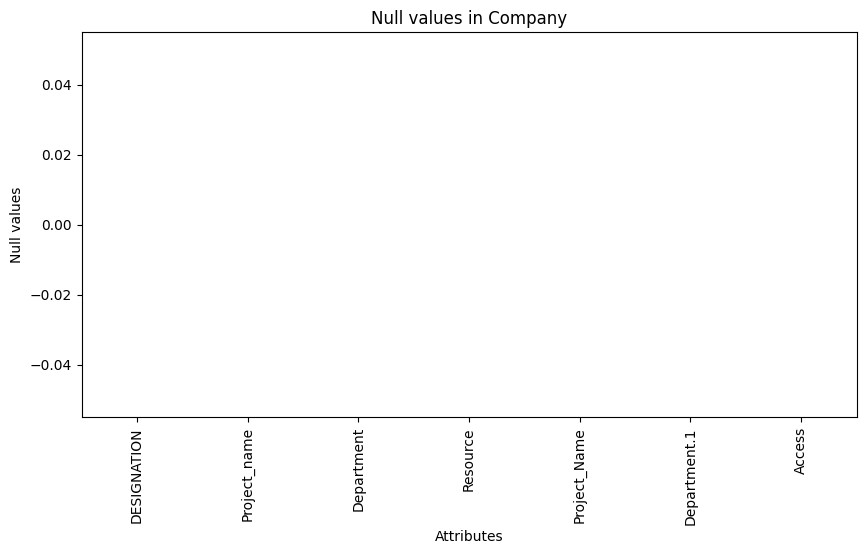

In [5]:
test_datas = []
train_datas = []
for test in tests:
    test_datas.append(pd.read_csv(test))
for train in trains:
    train_datas.append(pd.read_csv(train))

train_datas[0] = train_datas[0].fillna('NotA')

##replace Year with int values except NotA values
test_datas[0]['Year'] = test_datas[0]['Year'].replace('NotA',-1)
test_datas[0]['Year'] = test_datas[0]['Year'].astype(int)
train_datas[0]['Year'] = train_datas[0]['Year'].replace('NotA',-1)
train_datas[0]['Year'] = train_datas[0]['Year'].astype(int)

#Do the same with Year.1
test_datas[0]['Year.1'] = test_datas[0]['Year.1'].replace('NotA',-1)
test_datas[0]['Year.1'] = test_datas[0]['Year.1'].astype(int)
train_datas[0]['Year.1'] = train_datas[0]['Year.1'].replace('NotA',-1)
train_datas[0]['Year.1'] = train_datas[0]['Year.1'].astype(int)

for i in range(0,3):
    attr = new_attribute_values(test_datas[i],train_datas[i])
    json.dump(attr, open(f'attributechanges{data_names[i]}.json', 'w'))
    
#print number of null values in the data set
for i in range(0,3):
    #plot null values
    plt.figure(figsize=(10,5))
    plt.title(f'Null values in {data_names[i]}')
    plt.xlabel('Attributes')
    plt.ylabel('Null values')
    train_datas[i].isnull().sum().plot(kind='bar')


In [ ]:
def preprocessing(i):
        import pandas as pd
        
        change,change2 = change_from_train_data(train_datas[i], test_datas[i])
        #find invese mapping and save it to a file
        change.to_csv(f'change_{data_names[i]}.csv',index=False)
        change2.to_csv(f'change2_{data_names[i]}.csv',index=False)
        
thread1 = threading.Thread(target=preprocessing, args=(0,))
thread2 = threading.Thread(target=preprocessing, args=(1,))
thread3 = threading.Thread(target=preprocessing, args=(2,))
thread1.start()
thread2.start()
thread3.start()

    

train_row Designation       stu
Department        cse
Degree          btech
Year                2
Type            attdn
Department.1       ce
Degree.1        mtech
Year.1              2
Access             No
Name: 80, dtype: object
train_row DESIGNATION        HR MANAGER
Project_name             NotA
Department                 HR
Resource        SALARY_DETAIL
Project_Name               P2
Department.1               HR
Access                    YES
Name: 1, dtype: object
train_row DESIGNATION        HR MANAGER
Project_name             NotA
Department                 HR
Resource        SALARY_DETAIL
Project_Name               P1
Department.1               HR
Access                    YES
Name: 0, dtype: object
train_row DESIGNATION        HR MANAGER
Project_name             NotA
Department                 HR
Resource        SALARY_DETAIL
Project_Name               P1
Department.1               HR
Access                    YES
Name: 0, dtype: object
train_row DESIGNATION        HR MANAGER

train_rowtrain_row DESIGNATION        DESIGNER
Project_name             P1
Department      DEVELOPMENT
Resource         EMP_DETAIL
Project_Name             P1
Department.1    DEVELOPMENT
Access                   NO
Name: 66, dtype: object
train_row DESIGNATION        DESIGNER
Project_name             P1
Department      DEVELOPMENT
Resource         EMP_DETAIL
Project_Name             P2
Department.1    DEVELOPMENT
Access                   NO
Name: 67, dtype: object
train_row DESIGNATION          DESIGNER
Project_name               P1
Department        DEVELOPMENT
Resource        SALARY_DETAIL
Project_Name               P1
Department.1               HR
Access                     NO
Name: 68, dtype: object
train_row DESIGNATION          DESIGNER
Project_name               P1
Department        DEVELOPMENT
Resource        SALARY_DETAIL
Project_Name               P2
Department.1               HR
Access                     NO
Name: 69, dtype: object
train_row DESIGNATION          DESIGNER
Pro